# Bagaimana Peluang Usaha Cafe Unik di Los Angeles?

Saat ini, kita memiliki sebuah kafe kecil yang unik di Los Angeles (LA). Mengapa disebut unik? Karena kita "memperkerjakan" robot sebagai pelayan atau pramusaji. Proyek ini memang menjanjikan, namun membutuhkan modal yang besar.

Oleh karena itu, kita bersama para mitra memutuskan untuk menarik minat investor. Mereka tertarik dengan kondisi pasar saat ini—namun, apakah kita mampu mempertahankan kesuksesan saat daya tarik sang robot mulai pudar?

Para mitra pun meminta kita yang berprofesi sebagai pakar analisis untuk mempersiapkan sejumlah riset pasar. Kita memiliki data dari sumber terbuka (*open source*) terkait jenis-jenis usaha tempat makan di LA.

**KONTEN**

* [Pendahuluan]
* [Tahap 1. Eksplorasi Data]
    * [1.1 Inisialisasi]
    * [1.2 Memuat Data]
    * [1.3 Mempersiapkan Data]
    * [1.4 Kesimpulan dan Langkah Selanjutnya]
* [Tahap 2. Pra-pemrosesan Data]   
    * [2.1 Nilai yang Hilang]
    * [2.2 Mengatasi Duplikat]
    * [2.3 Memperbaiki Tipe Data]
    * [2.4 Kesimpulan dan Langkah Selanjutnya]
* [Tahap 3. Analisa Data]
    * [3.1 Jenis Usaha]
    * [3.2 Basis Usaha]
    * [3.3 Jenis Usaha Bersadarkan Basisnya]
    * [3.4 Ciri-ciri Jenis Usaha Berbasis Waralaba]
    * [3.5 Jumlah Kursi Terbanyak]
    * [3.6 Data Nama Jalan]
    * [3.7 Sepuluh Nama Jalan Teratas Berdasarkan Jumlah Usaha]
    * [3.8 Jalan yang Hanya Memiliki Satu Usaha]
    * [3.9 Distribusi Jumlah Kursi Tempat Makan di Jalan Paling Populer]
    * [3.10 Kesimpulan dan Langkah Selanjutnya] 
* [Kesimpulan Umum]

## Pendahuluan

Dalam proyek kali ini, kita akan mempelajari dan menganalisis data mengenai berbagai jenis usaha tempat makan di Los Angeles untuk menjawab pertanyaan para investor: apakah cafe unik yang menggunakan robot sebagai pramusaji seperti yang kita miliki ini akan dapat bertahan? 

### Tujuan

Mengetahui tren dari berbagai jenis usaha agar dapat menentukan apakah cafe unik yang menggunakan robot sebagai pramusaji seperti yang kita miliki ini akan dapat bertahan atau tidak.

### Tahapan

Kumpulan data terkait berbagai jenis usaha tempat makan di LA disimpan dalam file berikut `/datasets/rest_data_us.csv`. 

Pertama, karena tidak ada informasi terkait kualitas data tersebut, kita perlu memeriksanya terlebih dahulu. Kita akan melakukan pra-pemrosesan data, dan mencoba mengatasi masalah yang muncul pada data tersebut, seperti nilai yang hilang, duplikasi, dan sebagainya. Kemudian, kita akan melakukan analisa data dan terakhir menarik kesimpulan.
 
Proyek ini akan terdiri dari 3 tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data
 3. Analisa Data

## Eksplorasi Data

### Inisialisasi

In [135]:
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math
import numpy as np

### Memuat Data

In [136]:
df = pd.read_csv('/datasets/rest_data_us.csv')

### Mempersiapkan Data

Tabel `rest_data` berisi informasi:

 * object_name — nama usaha
 * chain — usaha berbasis waralaba (TRUE/FALSE)
 * object_type — jenis usaha
 * address — alamat
 * number — jumlah kursi

In [137]:
df

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [139]:
df.shape

(9651, 6)

### Kesimpulan dan Langkah Selanjutnya

Terdapat 6 kolom dan 9651 baris pada dataset yang kita miliki.

Kita dapat melihat beberapa permasalahan pada dataset tersebut, yaitu:

1. Terdapat nilai yang hilang pada kolom `chain`, dimana kolom tersebut hanya memiliki 9648 baris sedangkan keseluruhan dataset harusnya memiliki 9651 baris.

2. Kesalahan tipe data pada kolom `chain` yang seharusnya adalah bool, namun saat ini tipe datanya adalah object.

Langkah selanjutnya yang akan kita lakukan pada pra-pemrosesan data:

1. Mengisi nilai yang hilang dan memeriksa duplikat. Kita perlu meneliti lebih lanjut, apakah nilai yang hilang pada dataset adalah karena kesalahan *input* data atau karena alasan lain, sehingga kita dapat memutuskan langkah yang tepat untuk mengatasinya. Mungkin saja kita perlu mengisi nilai yang hilang dengan nilai rata - rata atau median dari pengelompokkan data dengan kolom lain, atau data tersebut dapat kita eliminasi karena dinilai tidak berpengaruh terhadap penelitian kita.

2. Mengganti tipe data pada kolom `chain` dari object menjadi bool.

## Pra-Pemrosesan Data

Pada tahap sebelumnya, kita sudah melihat bahwa terdapat beberapa masalah pada dataset yang kita miliki. Melalui tahap pra-pemrosesan data, kita akan coba mengatasi masalah - masalah tersebut.

### Nilai yang Hilang

In [140]:
df.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [141]:
df.isna().sum() / len(df) * 100

id             0.000000
object_name    0.000000
address        0.000000
chain          0.031085
object_type    0.000000
number         0.000000
dtype: float64

In [142]:
df[df['chain'].isna()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


Persentase nilai yang hilang pada kolom `chain` sangat kecil, yaitu sebesar 0.03% saja. Dengan mempertimbangkan persentasenya yang sangat kecil, data ini akan kita hapus, karena tidak akan mempengaruhi analisis data.

In [143]:
df = df.drop(df[df['chain'].isna()].index)

In [144]:
df[df['chain'].isna()]

,id,object_name,address,chain,object_type,number


Data dengan nilai yang hilang sudah kita hapus.

### Mengatasi Duplikat

In [145]:
df.duplicated().sum()

0

### Memperbaiki Tipe Data

In [146]:
df['chain'] = df['chain'].astype('bool')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   bool  
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 461.7+ KB


### Kesimpulan dan Langkah Selanjutnya

Setelah melakukan pra-pemrosesan data, kita dapat menarik kesimpulan sementara:

1. Terdapat nilai yang hilang pada kolom `chain`. Setelah dilakukan penelitian, persentase data yang hilang tersebut hanya 0.03%, karena itu, data tersebut sudah dihapus.

2. Tipe data kolom `chain` awalnya adalah object. Dengan mempertimbangkan bahwa kolom tersebut berisi kondisi Boolean (True/False), maka tipe data kolom `chain` sudah diganti menjadi tipe bool agar lebih sesuai.

3. Tidak terdapat data yang terduplikasi pada dataset yang kita miliki.

4. Setelah memperbaiki masalah-masalah yang ada, saat ini dataset kita mempunyai jumlah 6 kolom dan 9648 baris. 

Selanjutnya, kita dapat melakukan analisis data.

## Analisa Data

### Jenis Usaha

In [148]:
df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [149]:
df['object_type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

In [150]:
rest_type = df.groupby('object_type').count(). sort_values(by='id', ascending=False)
rest_type

,id,object_name,address,chain,number
object_type,,,,,
Restaurant,7253,7253,7253,7253,7253
Fast Food,1066,1066,1066,1066,1066
Cafe,435,435,435,435,435
Pizza,319,319,319,319,319
Bar,292,292,292,292,292
Bakery,283,283,283,283,283


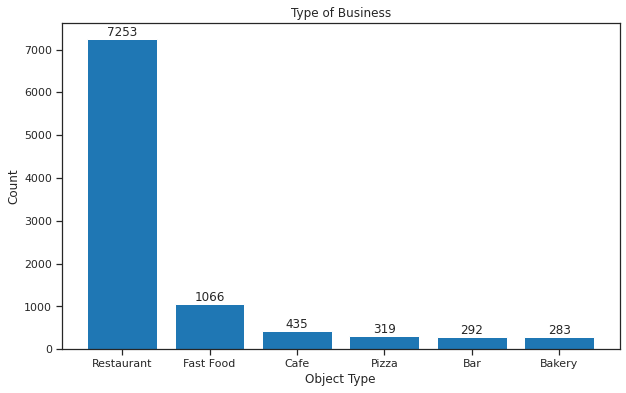

In [152]:
plt.figure(figsize=(10, 6))
plt.bar(rest_type.index, rest_type['id'])
plt.xlabel('Object Type')
plt.ylabel('Count')
plt.title('Type of Business')
plt.xticks(rotation=0)

for i, count in enumerate(rest_type['id']):
    plt.text(i, count, str(count), ha='center', va='bottom')

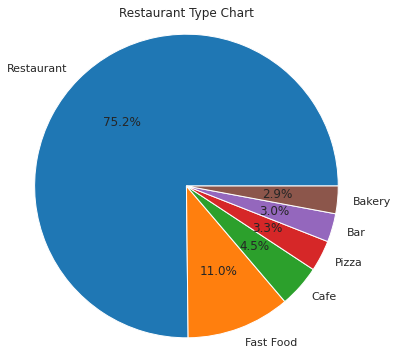

In [153]:
plt.figure(figsize = (6, 6))
sns.set_palette("tab10")  
plt.pie(rest_type['id'].values, labels = rest_type.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Restaurant Type Chart')
plt.show()

Melalui grafik visualisasi di atas, sepertinya jenis usaha yang paling banyak di Los Angeles ternyata didominasi oleh *restaurant*, dengan persentase sebanyak 75% dan total 7253 restaurant. Kemudian diikuti dengan *fast food*, dan *cafe* masing-masing di posisi ke-2 dan ke-3. 

### Basis Usaha

In [154]:
df['chain'].value_counts()

False    5972
True     3676
Name: chain, dtype: int64

Untuk mempermudah memahami data mengenai basis usaha tempat makan pada grafik visualisasi, kita akan mengganti nilai True dan False menjadi *franchise* dan *non_franchise*. Dimana True atau *franchise* berarti adalah usaha berbasis waralaba, sedangkan False atau *non_franchise* adalah usaha berbasis non-waralaba.

In [155]:
df_chain = df
df_chain['chain'] = df['chain'].replace(False, 'non_franchise')
df_chain['chain'] = df['chain'].replace(True, 'franchise')

In [156]:
chain_type = df.groupby('chain').count()
chain_type.sort_values('id', ascending=False)

,id,object_name,address,object_type,number
chain,,,,,
non_franchise,5972,5972,5972,5972,5972
franchise,3676,3676,3676,3676,3676


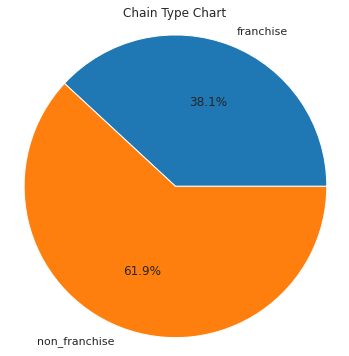

In [157]:
plt.figure(figsize = (6, 6))
sns.set_palette("tab10")  
plt.pie(chain_type['id'].values, labels = chain_type.index, autopct='%1.1f%%')
plt.axis('equal')

plt.title('Chain Type Chart')
plt.show()

Berdasarkan grafik visualisasi di atas, dapat kita lihat kebanyakan usaha tempat makan didominasi oleh usaha berbasis non-waralaba (non-franchise) dengan persentase 61.9% dan jumlahnya sebanyak 5972. Sedangkan sisanya ditempati oleh usaha berbasis waralaba atau *franchise*.

### Jenis Usaha Berdasarkan Basisnya

In [158]:
df['chain'] = df['chain'].replace('non_franchise', False)
df['chain'] = df['chain'].replace('franchise', True)

In [159]:
df_pivot = df.pivot_table(index = 'object_type', columns = 'chain', values = 'id', aggfunc = 'count').fillna(1)
df_pivot

chain,False,True
object_type,,
Bakery,1.0,283.0
Bar,215.0,77.0
Cafe,169.0,266.0
Fast Food,461.0,605.0
Pizza,166.0,153.0
Restaurant,4961.0,2292.0


In [160]:
df_pivot['ratio'] = (df_pivot[True] / (df_pivot[True] + df_pivot[False])).round(3)
df_pivot.sort_values(by='ratio', ascending=False)

chain,False,True,ratio
object_type,,,
Bakery,1.0,283.0,0.996
Cafe,169.0,266.0,0.611
Fast Food,461.0,605.0,0.568
Pizza,166.0,153.0,0.480
Restaurant,4961.0,2292.0,0.316
Bar,215.0,77.0,0.264


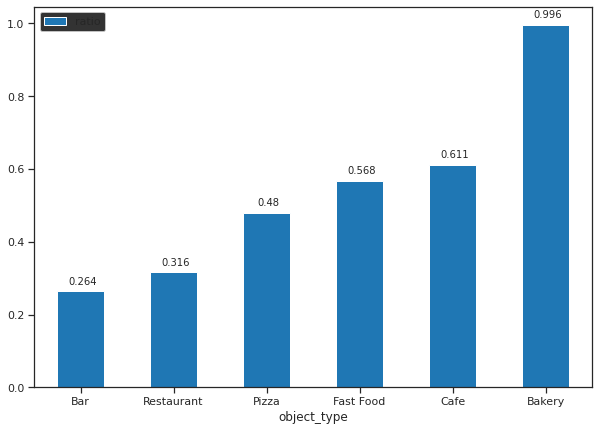

In [161]:
ax = df_pivot.sort_values(by='ratio').plot(kind='bar', y = 'ratio', figsize=(10, 7))
plt.xticks (rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()) ,\
               ha='center', va='center',
                                      xytext = (25,10), textcoords = 'offset points',
                                      size=10)
plt.show()   

Melalui ratio jenis usaha berbasis waralaba terhadap kedua jenis basis usaha, pada tabel dan grafik di atas, kita dapat melihat bahwa jenis usaha berbasis waralaba (nilai True) yang paling banyak adalah *Bakery*.

Sebelumnya, kita sudah membuat kondisi dimana jika terdapat nilai NaN maka akan diisi dengan nilai 1. Sehingga dapat kita lihat untuk jenis usaha *Bakery* sebenarnya terdapat nilai NaN pada kategori False(jenis usaha berbasis non-waralaba) atau dapat diartikan tidak ada satupun *Bakery* yang berbasis non-waralaba.

### Ciri-ciri Jenis Usaha Berbasis Waralaba

In [162]:
rest_chain = df[df['chain'] == True]
rest_chain

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
...,...,...,...,...,...,...
9629,21415,JUCUAPA BAKERY,2810 JAMES WOOD BLVD,True,Bakery,10
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD # A-B,True,Restaurant,47
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15


In [163]:
rest_chain['object_type'].value_counts()

Restaurant    2292
Fast Food      605
Bakery         283
Cafe           266
Pizza          153
Bar             77
Name: object_type, dtype: int64

In [164]:
rest_chain[rest_chain['object_type'] == 'Restaurant']

,id,object_name,address,chain,object_type,number
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
15,11801,FOOD COURT TRAY WASHING AREA,928 S WESTERN AVE STE 300,True,Restaurant,21
24,11810,M CAFE DE CHAYA,7119 MELROSE AVE,True,Restaurant,43
27,11813,NORM'S RESTAURANT,470 N LA CIENEGA BLVD,True,Restaurant,80
...,...,...,...,...,...,...
9608,21394,GO GET EM TIGER,230 N LARCHMONT BLVD,True,Restaurant,5
9618,21404,JUCUAPA RESTAURANT,2814 JAMES WOOD BLVD,True,Restaurant,19
9621,21407,RED ROCK,11301 W OLYMPIC BLVD # 210,True,Restaurant,41
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD # A-B,True,Restaurant,47


In [165]:
rest_chain[rest_chain['object_name'] == 'EL POLLO LOCO'].sort_values(by='number', ascending=False)

,id,object_name,address,chain,object_type,number
4089,15875,EL POLLO LOCO,2201 N BROADWAY,True,Restaurant,139
3649,15435,EL POLLO LOCO,2000 E CESAR E CHAVEZ AVE,True,Restaurant,94
7774,19560,EL POLLO LOCO,330 N ALVARADO ST,True,Restaurant,92
1577,13363,EL POLLO LOCO,8154 W SUNSET BLVD,True,Restaurant,77
1569,13355,EL POLLO LOCO,226 E 9TH ST STE 1124,True,Restaurant,47
4075,15861,EL POLLO LOCO,1360 W IMPERIAL HWY,True,Restaurant,47
5122,16908,EL POLLO LOCO,5001 WILSHIRE BLVD STE 101,True,Restaurant,39
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
5551,17337,EL POLLO LOCO,260 S BROADWAY,True,Restaurant,32
2018,13804,EL POLLO LOCO,12800 S AVALON BLVD,True,Restaurant,31


In [166]:
rest_chain[rest_chain['object_name'] == 'EL POLLO LOCO'].count()

id             10
object_name    10
address        10
chain          10
object_type    10
number         10
dtype: int64

In [167]:
rest_chain[rest_chain['object_type'] == 'Fast Food']

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
40,11826,SUBWAY -52105,255 S GRAND AVE STE 101,True,Fast Food,37
42,11828,PANDA EXPRESS #2596,1544 S LA CIENEGA BLVD,True,Fast Food,22
67,11853,DONUT STAR,4102 VERDUGO RD,True,Fast Food,24
71,11857,MCDONALD'S #2084,3124 N SAN FERNANDO RD,True,Fast Food,112
...,...,...,...,...,...,...
9586,21372,BEST DONUTS,3991 S WESTERN AVE UNIT 1,True,Fast Food,15
9591,21377,TACOS Y GUISADOS EL CHARRO,10024 S FIGUEROA ST,True,Fast Food,14
9593,21379,PANDA EXPRESS 2919,1810 W SLAUSON AVE,True,Fast Food,15
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135


In [168]:
rest_chain[rest_chain['object_name'] == 'SUBWAY'].sort_values(by='number', ascending=False)

,id,object_name,address,chain,object_type,number
3998,15784,SUBWAY,635 S HOBART BLVD,True,Fast Food,43
566,12352,SUBWAY,3991 S WESTERN AVE STE #3,True,Fast Food,40
4436,16222,SUBWAY,5701 S CENTRAL AVE,True,Fast Food,29
4753,16539,SUBWAY,5864 S VERMONT AVE,True,Fast Food,28
5012,16798,SUBWAY,12730 S FIGUEROA ST STE 102,True,Fast Food,25
4509,16295,SUBWAY,7825 BEVERLY BLVD STE #4,True,Fast Food,25
8739,20525,SUBWAY,11762 SAN VICENTE BLVD,True,Fast Food,23
1057,12843,SUBWAY,610 S RAMPART BLVD,True,Fast Food,22
4282,16068,SUBWAY,198 S VERMONT AVE,True,Fast Food,21
6893,18679,SUBWAY,1400 W PICO BLVD,True,Fast Food,20


In [169]:
rest_chain[rest_chain['object_name'] == 'SUBWAY'].count()

id             31
object_name    31
address        31
chain          31
object_type    31
number         31
dtype: int64

Text(0, 0.5, 'density')

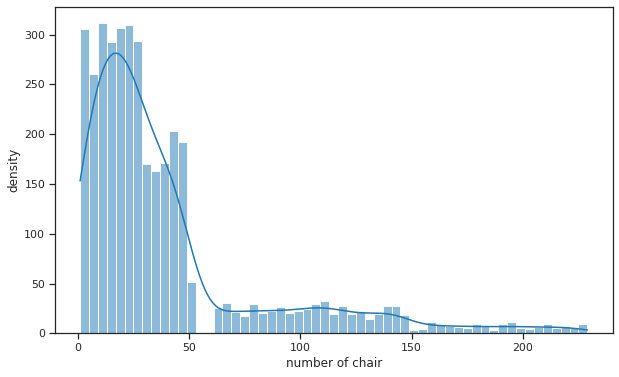

In [170]:
plt.figure(figsize = (10, 6))
sns.histplot(rest_chain['number'], kde=True)
plt.xlabel('number of chair')
plt.ylabel('density')

Seperti yang kita tahu pada umumnya, bisnis waralaba biasanya memiliki banyak tempat atau banyak cabang. Namun, apakah hal tersebut berlaku di wilayah LA? Kita mencoba melihat ciri-ciri usaha berbasis waralaba melalui data yang kita punya, apakah mereka memiliki banyak tempat dengan kursi sedikit atau memiliki beberapa tempat dengan jumlah kursi yang banyak. 

Kita melakukan percobaan dengan mengambil sampel masing-masing 1 tempat dari jenis usaha tipe *restaurant* dan *fast food* yang memiliki jumlahnya paling banyak untuk bisnis waralaba. Ternyata, didapatkan hasilnya beragam, namun, ciri yang banyak muncul secara umum adalah banyak tempat. 
Kemudian, kita juga mencoba melihat dari keseluruhan jenis usaha melalui grafik, berapa banyak jumlah kursi yang biasanya dimiliki oleh usaha tempat makan. Hasilnya, kebanyakan tempat usaha, memiliki kursi yang jumlahnya tidak lebih dari 50.

Sehingga dapat dikatakan, ciri-ciri dari usaha bisnis waralaba adalah memiliki banyak tempat dengan kursi sedikit.

### Jumlah Kursi Terbanyak

In [171]:
avg_chair = df.groupby('object_type').agg(mean = ('number', 'mean'), total = ('number', 'sum')).sort_values(by = 'mean')
avg_chair

,mean,total
object_type,,
Bakery,21.773852,6162
Cafe,25.000000,10875
Pizza,28.545455,9106
Fast Food,31.837711,33939
Bar,44.767123,13072
Restaurant,48.048807,348498


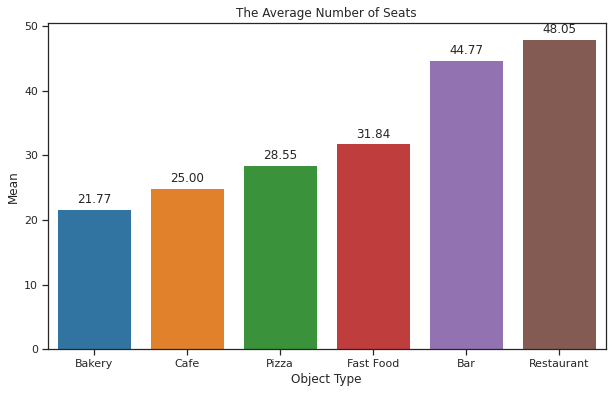

In [172]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = avg_chair.index, y = avg_chair['mean'], palette = sns.color_palette('tab10', len(avg_chair.index)))

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    
ax.set_title('The Average Number of Seats')
ax.set_xlabel('Object Type')
ax.set_ylabel('Mean')

plt.show()

Berdasarkan tabel dan grafik visualisasi, secara rata-rata, jenis usaha *Restaurant* memiliki jumlah kursi terbanyak. Lalu diikuti dengan *Bar* dan *Fast Food* di urutan ke-2 dan ke-3. Untuk posisi jumlah kursi paling sedikit ditempati oleh *Bakery*

Hal ini sangat wajar, selain karena jenis usaha *Restaurant* jumlahnya sangat banyak, restoran juga biasanya mengusung konsep tempat yang dapat menampung banyak orang untuk makan di tempat (*dine-in*) dan bukan layanan cepat saji maupun hanya melayani *take away*, sehingga pasti mereka memiliki jumlah kursi yang banyak.

Yang menarik adalah *Bar*, dimana kita tahu bahwa jumlah jenis usaha ini hanya sedikit, jauh dibandingkan *Restaurant* dan *Fast Food*, namun, ternyata mereka juga memiliki banyak kursi (lihat perbedaan rata-ratanya yang tidak terlalu besar dari *Restaurant*). Mungkin saja setiap 1 *bar* memiliki tempat/area yang luas sehingga kursi yang dimilikinya sangat banyak, jadi, meskipun jumlah *bar* di wilayah LA sedikit, rata-rata jumlah kursinya banyak.

### Data Nama Jalan

In [173]:
df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [174]:
df['address_name'] = df['address'].apply(lambda x: ' '.join(x.split(' ')[1:]))

In [175]:
df.head()

,id,object_name,address,chain,object_type,number,address_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY # 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD # 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


Kita akan menganalisa jalan atau alamat mana yang paling populer berdasarkan jumlah usaha. Namun, kita perlu memisahkan nama jalan tersebut dengan menghilangkan nomor unik dari nama-nama jalan tersebut, kemudian menambahkannya di kolom yang baru, yaitu `address_name`.

Selanjutnya, kita akan melihat 10 nama jalan teratas berdasarkan jumlah usaha.

### Sepuluh Nama Jalan Teratas Berdasarkan Jumlah Usaha

In [176]:
top_ten = df['address_name'].value_counts().head(10)
top_ten

W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       167
WILSHIRE BLVD        161
S VERMONT AVE        148
SANTA MONICA BLVD    146
W 3RD ST             145
BEVERLY BLVD         135
S FIGUEROA ST        134
S WESTERN AVE        128
Name: address_name, dtype: int64

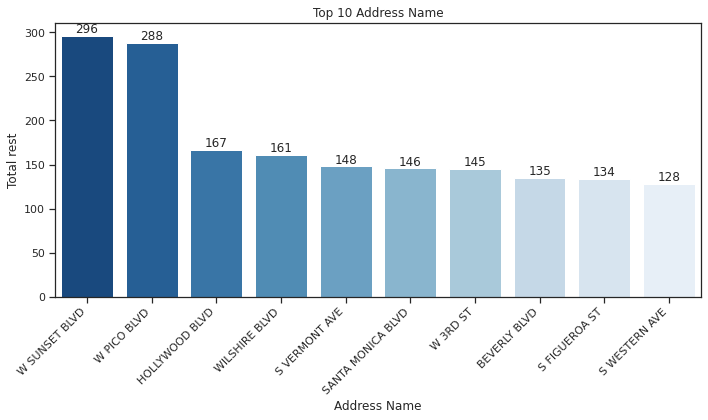

In [177]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top_ten.index, y = top_ten.values, palette = 'Blues_r')

for i, count in enumerate(top_ten.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

    plt.xticks(rotation=45, ha='right')

plt.xlabel('Address Name')
plt.ylabel('Total rest')
plt.title('Top 10 Address Name')
plt.tight_layout()
plt.show()

Grafik visualisasi di atas menunjukkan 10 nama jalan teratas berdasarkan jumlah usaha tempat makan.
Jalanan yang paling populer sebagai wilayah dengan tempat makan terbanyak adalah **W SUNSET BLVD** dimana terdapat 296 tempat makan dan **W PICO BLVD** dengan 288 tempat makan . Hasil ini sangat wajar, mengingat jalan **W SUNSET BLVD** merupakan salah 1 jalan utama yang berada di pusat kota LA, dan memiliki panjang 35 km. Sedangkan **W PICO BLVD** juga merupakan salah 1 jalan utama yang memiliki banyak landmark atau tempat/obyek terkenal di LA. Sehingga, wajar jika terdapat banyak sekali tempat makan di kedua jalan ini.

### Jalan yang Hanya Memiliki Satu Usaha

In [178]:
one_rest = df['address_name'].value_counts()[df['address_name'].value_counts() == 1]
one_rest

WALL ST STE 6              1
HOLLYWOOD BLVD STE #10     1
MELROSE AVE # 101          1
W 3RD ST STE #C            1
SANTA MONICA BLVD # 52     1
                          ..
S SPRING ST STE 110        1
MARIACHI PLZ               1
N LA CIENEGA BLVD # 114    1
WILSHIRE BLVD STE 118      1
S FIGUEROA ST FL 9TH       1
Name: address_name, Length: 2481, dtype: int64

In [179]:
one_rest.count()

2481

Terdapat total 2481 nama jalan yang hanya memiliki 1 tempat makan saja.

### Distribusi Jumlah Kursi Tempat Makan di Jalan Paling Populer

Kita akan mencoba mengamati tren apakah yang muncul untuk jalan yang dihuni oleh banyak usaha (tempat makan), yang telah kita dapatkan hasilnya sebelumnya, yaitu **W SUNSET BLVD**. Mari kita amati distribusi jumlah kursi dari tempat makan yang berada di wilayah tersebut.

In [180]:
top_rest = df[df['address_name'].str.contains('W SUNSET BLVD')].reset_index(drop=True)
top_rest

,id,object_name,address,chain,object_type,number,address_name
0,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
1,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,W SUNSET BLVD
2,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26,W SUNSET BLVD #A
3,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,True,Restaurant,118,W SUNSET BLVD
4,11819,ONO HAWAIIAN BBQ,5539 W SUNSET BLVD,True,Restaurant,35,W SUNSET BLVD
...,...,...,...,...,...,...,...
363,21284,PA ORD EXPRESS,5301 W SUNSET BLVD # 11,False,Fast Food,31,W SUNSET BLVD # 11
364,21309,BUTTER'S ICE CREAM,2925 W SUNSET BLVD,False,Restaurant,29,W SUNSET BLVD
365,21313,REGULA GUY'S PIZZA,5173 W SUNSET BLVD,False,Pizza,20,W SUNSET BLVD
366,21348,7-ELEVEN STORE #18778D,7600 W SUNSET BLVD,False,Restaurant,1,W SUNSET BLVD


In [181]:
top_rest.groupby('object_type').count(). sort_values(by='id', ascending=False)

,id,object_name,address,chain,number,address_name
object_type,,,,,,
Restaurant,271,271,271,271,271,271
Fast Food,31,31,31,31,31,31
Cafe,24,24,24,24,24,24
Pizza,17,17,17,17,17,17
Bar,13,13,13,13,13,13
Bakery,12,12,12,12,12,12


In [182]:
chain_true = top_rest[top_rest['chain'] == True]
chain_false = top_rest[top_rest['chain'] == False]

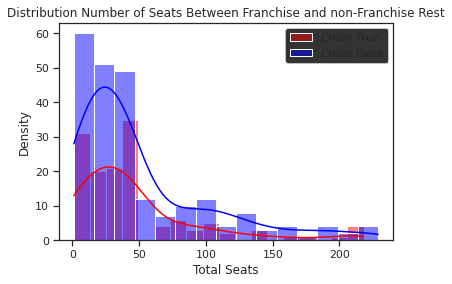

In [183]:
sns.histplot(chain_true['number'], color='red', label='Chain True', kde=True)
sns.histplot(chain_false['number'], color='blue', label='Chain False', kde=True)

plt.xlabel('Total Seats')
plt.ylabel('Density')
plt.title('Distribution Number of Seats Between Franchise and non-Franchise Rest')

plt.legend()
plt.show()

Seperti yang dapat kita lihat pada grafik visualisasi di atas, distribusi jumlah kursi dari tempat makan di **W SUNSET BLVD**, baik untuk yang berbasis waralaba (*franchise*) maupun non-waralaba (*non-franchise*), kurang lebih sama, yaitu berada di kisaran angka 0 hingga 50. Artinya, kebanyakan tempat makan di jalan **W SUNSET BLVD** memiliki jumlah kursi yang sedikit.

### Kesimpulan dan Langkah Selanjutnya

Setelah melakukan analisa data, maka kita dapat menarik kesimpulan:

1. Jenis usaha yang paling banyak di Los Angeles (LA) ternyata didominasi oleh *restaurant*, dengan persentase sebanyak 75% dan total 7253 restaurant.

2. Kebanyakan usaha tempat makan di LA didominasi oleh usaha berbasis non-waralaba (non-franchise) dengan persentase 61.9% dan jumlahnya sebanyak 5972. Sedangkan sisanya ditempati oleh usaha berbasis waralaba atau *franchise* sebanyak 38.1% dan jumlahnya sebanyak 3676.

3. Melalui ratio jenis usaha berbasis waralaba terhadap kedua jenis basis usaha, jenis usaha berbasis waralaba (nilai True) yang paling banyak adalah *Bakery*.

4. Seperti yang kita tahu pada umumnya, bisnis waralaba biasanya memiliki banyak tempat atau banyak cabang. Setelah dilakukan percobaan dengan mengambil sampel masing-masing 1 tempat dari jenis usaha tipe *restaurant* dan *fast food* yang memiliki jumlahnya paling banyak untuk bisnis waralaba. Ternyata, didapatkan hasilnya beragam, namun, ciri yang banyak muncul secara umum adalah banyak tempat. 
Kemudian, kita juga mencoba melihat dari keseluruhan jenis usaha melalui grafik, berapa banyak jumlah kursi yang biasanya dimiliki oleh usaha tempat makan. Hasilnya, kebanyakan tempat usaha, memiliki kursi yang jumlahnya tidak lebih dari 50.

Sehingga dapat dikatakan, ciri-ciri dari usaha bisnis waralaba adalah memiliki banyak tempat dengan kursi sedikit.

5. Secara rata-rata, jenis usaha *Restaurant* memiliki jumlah kursi terbanyak. Lalu diikuti dengan *Bar* dan *Fast Food* di urutan ke-2 dan ke-3. Untuk posisi jumlah kursi paling sedikit ditempati oleh *Bakery*.

6. Setelah melihat 10 nama jalan teratas berdasarkan jumlah usaha tempat makan, jalanan yang paling populer sebagai wilayah dengan tempat makan terbanyak adalah **W SUNSET BLVD** dimana terdapat 296 tempat makan dan **W PICO BLVD** dengan 288 tempat makan. 

7. Terdapat total 2481 nama jalan yang hanya memiliki 1 tempat makan saja.

8. Distribusi jumlah kursi dari tempat makan di **W SUNSET BLVD**, baik untuk yang berbasis waralaba (*franchise*) maupun non-waralaba (*non-franchise*), kurang lebih sama, yaitu berada di kisaran angka 0 hingga 50. Artinya, kebanyakan tempat makan di jalan **W SUNSET BLVD** memiliki jumlah kursi yang sedikit.

## Kesimpulan Umum

Kita telah mencoba untuk mengolah data dan dapat menarik kesimpulan.

Kumpulan data terkait berbagai jenis usaha tempat makan di LA disimpan dalam file berikut `/datasets/rest_data_us.csv`.
Terdapat 6 kolom dan 9651 baris pada dataset yang kita miliki.

Dari tahap pra-pemrosesan data terhadap masing - masing tabel, kita mendapat kesimpulan, bahwa:

1. Terdapat nilai yang hilang pada kolom `chain`. Setelah dilakukan penelitian, persentase data yang hilang tersebut hanya 0.03%, karena itu, data tersebut sudah dihapus.

2. Tipe data kolom `chain` awalnya adalah object. Dengan mempertimbangkan bahwa kolom tersebut berisi kondisi Boolean (True/False), maka tipe data kolom `chain` sudah diganti menjadi tipe bool agar lebih sesuai.

3. Tidak terdapat data yang terduplikasi pada dataset yang kita miliki.

Setelah memperbaiki masalah-masalah yang ada, saat ini dataset kita mempunyai jumlah 6 kolom dan 9648 baris.

Selanjutnya, kita mencoba menganalisa data dengan melakukan beberapa langkah, yaitu:

1. Menganalisa jenis usaha apakah yang paling banyak di Los Angeles (LA). Dari penelitian, didapatkan hasil ternyata jenis usaha tersebut didominasi oleh *restaurant*, dengan persentase sebanyak 75% dan total 7253 restaurant.

2. Meneliti proporsi dari usaha berbasis waralaba dan nonwaralaba. Hasilnya, kebanyakan usaha tempat makan di LA didominasi oleh usaha berbasis non-waralaba (non-franchise) dengan persentase 61.9% dan jumlahnya sebanyak 5972. Sedangkan sisanya ditempati oleh usaha berbasis waralaba atau *franchise* sebanyak 38.1% dan jumlahnya sebanyak 3676.

3. Menghitung ratio jenis usaha berbasis waralaba terhadap kedua jenis basis usaha, dan didapatkan hasil bahwa jenis usaha berbasis waralaba (nilai True) yang paling banyak adalah *Bakery*.

4. Setelah dilakukan percobaan dengan mengambil sampel masing-masing 1 tempat dari jenis usaha tipe *restaurant* dan *fast food* yang memiliki jumlahnya paling banyak untuk bisnis waralaba. Ternyata, didapatkan hasilnya beragam, namun, ciri yang banyak muncul secara umum adalah banyak tempat. 
Kemudian, kita juga mencoba melihat dari keseluruhan jenis usaha, berapa banyak jumlah kursi yang biasanya dimiliki oleh usaha tempat makan. Hasilnya, kebanyakan tempat usaha, memiliki kursi yang jumlahnya tidak lebih dari 50.
Sehingga dapat dikatakan, ciri-ciri dari usaha bisnis waralaba adalah memiliki banyak tempat dengan kursi sedikit.

5. Menghitung jumlah rata-rata kursi untuk setiap jenis usaha. Secara rata-rata, jenis usaha *Restaurant* memiliki jumlah kursi terbanyak. Lalu diikuti dengan *Bar* dan *Fast Food* di urutan ke-2 dan ke-3. Untuk posisi jumlah kursi paling sedikit ditempati oleh *Bakery*.

6. Menganalisa dan mendapatkan 10 nama jalan teratas berdasarkan jumlah usaha tempat makan. dari penelitian tersebut, didapatkan hasil bahwa jalanan yang paling populer sebagai wilayah dengan tempat makan terbanyak adalah **W SUNSET BLVD** dimana terdapat 296 tempat makan dan **W PICO BLVD** dengan 288 tempat makan. Sedangkan untuk jalan yang hanya memiliki 1 usaha tempat makan berjumlah 2481.

8. Menghitung distribusi jumlah kursi dari tempat makan di jalan yang memiliki tempat makan paling banyak, yaitu **W SUNSET BLVD**. Hasilnya, baik untuk yang berbasis waralaba (*franchise*) maupun non-waralaba (*non-franchise*), kurang lebih sama, yaitu berada di kisaran angka 0 hingga 50. Artinya, kebanyakan tempat makan di jalan **W SUNSET BLVD** memiliki jumlah kursi yang sedikit.

Dengan demikian, kita dapat menyimpulkan bahwa usaha tempat makan di Los Angeles (LA) yang paling banyak adalah tipe *restaurant*. Namun, berdasarkan basisnya, jenis usaha tempat makan masih didominasi oleh usaha berbasis non-waralaba, karena jenis usaha ini berjumlah lebih dari 50% dari keseluruhan usaha tempat makan di LA (jenis usaha berbasis waralaba hanya berjumlah sekitar 38% saja dari total keseluruhan).

Setelah melihat hasil analisa data, sepertinya usaha cafe unik yang memperkerjakan robot sebagai pramusaji, merupakan pilihan yang cukup menjanjikan. Jumlah cafe di LA masih sedikit, dan kita juga dapat mempertimbangkan untuk membuat usaha cafe ini berbasis waralaba, karena jenis usaha berbasis waralaba tidak terlalu populer di LA, sehingga peluang usaha untuk sukses cukup menjanjikan. Kita juga bisa mempertimbangkan membuka usaha cafe ini di jalan W Sunset BLVD. Memang di jalan tersebut sudah terdapat banyak usaha tempat makan, namun, yang berjenis cafe masih sedikit. Lagipula, meskipun banyak saingan, lebih baik membuka usaha di tempat yang ramai bukan, daripada yang lebih sepi? Sehingga kita perlu untuk mengambil peluang yang baik ini.

Presentasi: https://drive.google.com/file/d/1Pj3V-LBEuxE0rJxvFah3r5AfA0h2vk3z/view?usp=sharing